In [3]:
# import networkx as nx
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import pandas as pd
import random as rand
import networkx as nx
from sympy import *

sp.init_printing()

# Grafteoretisk Modellering af Netværk

## Opgave 1 

Visualisering af netværk med brug af dictionaries og `networkx` pakken

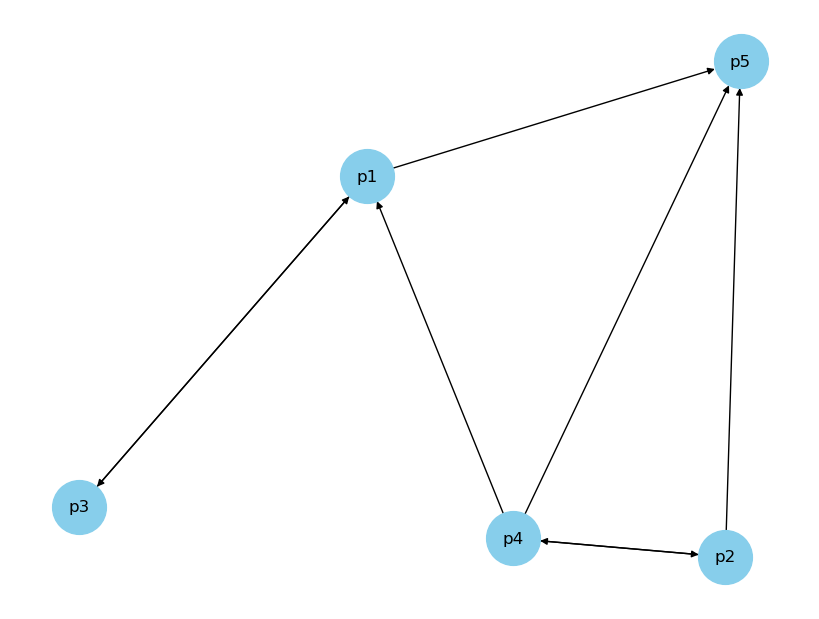

In [4]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5']
G.add_nodes_from(nodes)

edges = [('p1', 'p3'), ('p1', 'p5'),
         ('p2', 'p4'), ('p2', 'p5'),
         ('p3', 'p1'),
         ('p4', 'p1'), ('p4', 'p2'), ('p4', 'p5')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.show()


## Opgave 2

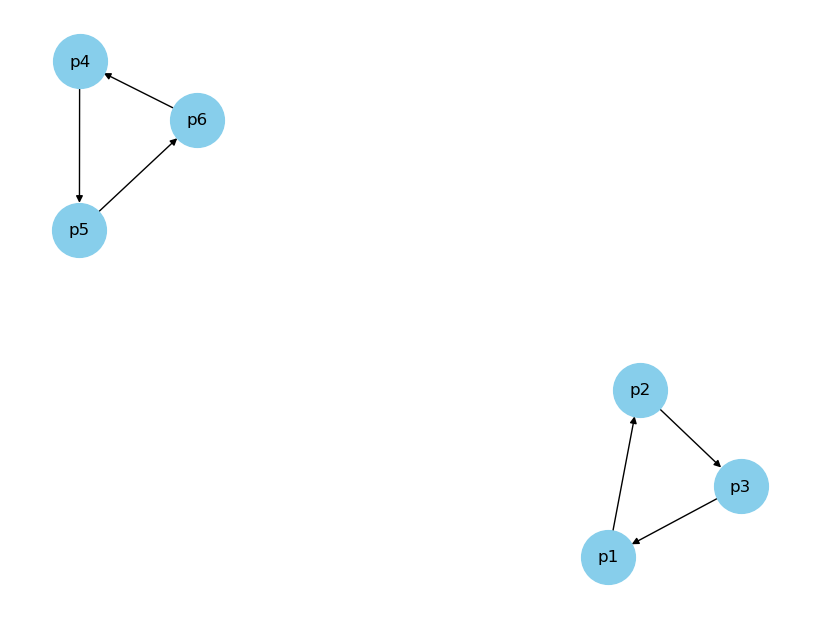

In [5]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
G.add_nodes_from(nodes)

edges = [('p1', 'p2'),
         ('p2', 'p3'),
         ('p3', 'p1'),
         ('p4', 'p5'),
         ('p5', 'p6'),
         ('p6', 'p4')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.show()


## Opgave 3 & 4

In [6]:


# Definition af netværket
W1 = {
    'P1': {'P2', 'P3'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {}
}

W2 = {
    'P1': {'P2'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {'P6'},
    'P6': {'P4'}
}

def makeAdjacencyMatrix(W):
    nodes = list(W.keys())
    length = len(nodes)  
    
    output = np.zeros((length, length), dtype=int)
    
    node_index = {node: idx for idx, node in enumerate(nodes)}
    
    for i, node in enumerate(nodes):
        for neighbor in W[node]:
            j = node_index[neighbor]  
            output[i][j] = 1  
    
    return output

# Test function
print("W1")
print(makeAdjacencyMatrix(W1))
print("\nW2")
print(makeAdjacencyMatrix(W2))

W1
[[0 1 1 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]]

W2
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]]


## Opgave 5

In [7]:
def checkArrayValue(array,value):
    for i in range(0,len(array)):
        if array[i] == value:
            return True
        
    return False

def make_web(n,k,kmin=0):

    # Input: n og k er ikke-negative heltal
    # Output: web er en dictionary med n nøgler.
    # Værdien af hver nøgle er en liste, der er en delmængde af nøglerne.
    
    assert(k < n), "k skal være mindre end n (da man ikke kan linke til sig selv)"
    assert(kmin <= k), "kmin skal være mindre end eller lig med k"
    keys = list(range(n)) # definerer n nøgler fra 0 til n-1 
    web = dict()
    
    for j in keys:
        numlinks = np.random.randint(kmin, k + 1) 
        links = list(np.random.choice([x for x in keys if x != j], size=numlinks, replace=False))
        web[j] = links 

    return web

print(make_web(100,99,50))

{0: [np.int64(63), np.int64(25), np.int64(93), np.int64(43), np.int64(35), np.int64(98), np.int64(67), np.int64(6), np.int64(23), np.int64(27), np.int64(83), np.int64(61), np.int64(34), np.int64(42), np.int64(71), np.int64(81), np.int64(69), np.int64(26), np.int64(19), np.int64(12), np.int64(44), np.int64(2), np.int64(82), np.int64(3), np.int64(18), np.int64(78), np.int64(77), np.int64(15), np.int64(14), np.int64(68), np.int64(31), np.int64(20), np.int64(54), np.int64(33), np.int64(62), np.int64(39), np.int64(28), np.int64(65), np.int64(57), np.int64(66), np.int64(87), np.int64(11), np.int64(64), np.int64(56), np.int64(52), np.int64(91), np.int64(99), np.int64(24), np.int64(94), np.int64(49), np.int64(59), np.int64(95), np.int64(5), np.int64(92), np.int64(79), np.int64(48), np.int64(86), np.int64(47), np.int64(45), np.int64(30), np.int64(46), np.int64(60), np.int64(40), np.int64(9), np.int64(76), np.int64(38), np.int64(89), np.int64(84), np.int64(8), np.int64(90), np.int64(85), np.int6

## Opgave 6

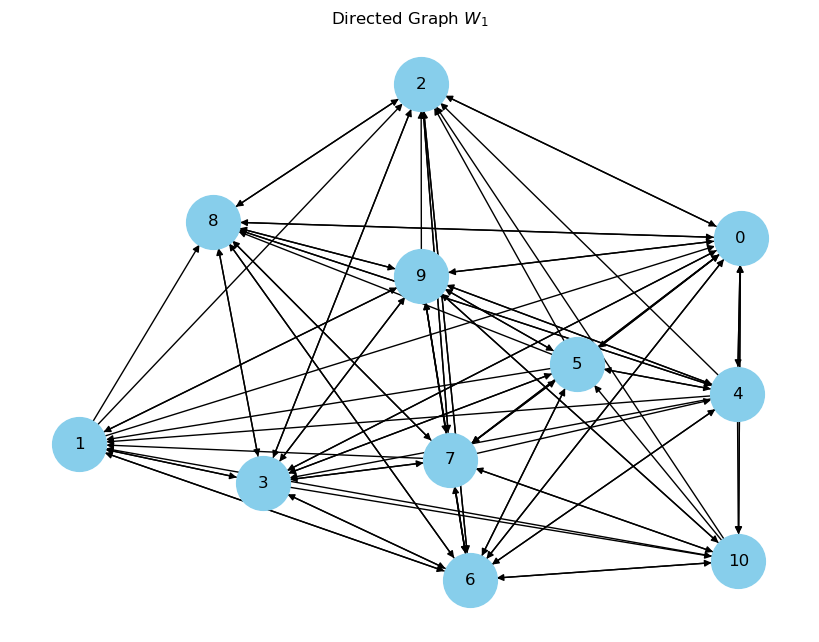

In [8]:
def visualize_graph(web):
    # Input: netværk som dictionary
    # Output: Netværk visualiseret som graf

    G = nx.DiGraph()

    for node, neighbors in web.items():
        for target in neighbors:
            G.add_edge(node, target)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
    plt.title("Directed Graph $W_1$")
    plt.show()

visualize_graph(make_web(11,10,5))

# Link Matricen og Random Surver Modellen

## Opgave 7

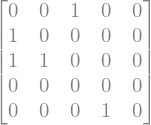

In [9]:
adjMatrixW1 = sp.Matrix([[0,0,1,0,0],
                        [1,0,0,0,0],
                        [1,1,0,0,0],
                        [0,0,0,0,0],
                        [0,0,0,1,0]])
adjMatrixW1

Vi ser at P5 er en sink, da det er en 0-vektor og ikke linker til andre hjemmesider.

## Opgave 8

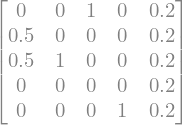

In [10]:
L_ij = sp.Matrix([[0,0,1,0,1/5],
                  [1/2,0,0,0,1/5],
                  [1/2,1,0,0,1/5],
                  [0,0,0,0,1/5],
                  [0,0,0,1,1/5]])
L_ij

Hvis der er link imellem P_j og P_i er sandsynligheden 1 over antallet af edges i P_j. Hvis P_j er en sink, så er sandsynligheden 1 over antallet af alle hjemmesider.

Alle søjlerne er sandsynlighedsvektorer. Deres elementer er ikke-negative og summerer til 1.

Det er nærmest det samme som matricen, fordi mange af hjemmesiderne kun linker til en anden hjemmeside. De fleste nuller bliver ved med at være 0, men for P5, som er en sink bliver sandsynligheden for at komme ind på en vilkårlig side 1/5. 

## Opgave 9

In [11]:
def counter(p, counts):
    if p in counts:
        counts[p] += 1


In [12]:
chosenp = None
def surf_step(web, p):
    
    # Input: Et netværk som dictionary og en start side
    # Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
    
    distribution=dict()
    counts = {key: 0 for key in web}
    
    distribution = dict(counts)

    if not p:  
        p = rand.choice(list(web.keys()))
    elif not web[p]: 
        p = rand.choice(list(web.keys()))
    else:
        p = rand.choice(list(web[p]))
    counter(p, counts)

    global chosenp
    chosenp = p

    total = sum(counts.values())
    if total > 0:
        for i in counts:
            distribution[i] = counts[i] / total

    return distribution


In [13]:
surf_step(W1, 'P1')

{'P1': 0.0, 'P2': 1.0, 'P3': 0.0, 'P4': 0.0, 'P5': 0.0}

## Opgave 10

In [14]:
import random
def random_surf(web, n):
    
    # Input: Et netværk som dictionary og en start side
    # Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
    
    ranking = {key: 0 for key in web}

    p = random.choice(list(web.keys()))

    for _ in range(n):
        temp = surf_step(web, p) 
        
        for page in ranking:
            ranking[page] += temp.get(page, 0)

        p =  chosenp

    for page in ranking:
        ranking[page] /= n

    return ranking




## Opgave 11

In [15]:
random_surf(W1, 100)

{'P1': 0.38, 'P2': 0.24, 'P3': 0.38, 'P4': 0.0, 'P5': 0.0}

In [16]:
random_surf(W1, 1000)

{'P1': 0.4, 'P2': 0.201, 'P3': 0.399, 'P4': 0.0, 'P5': 0.0}

In [17]:
random_surf(W1, 10000)

{'P1': 0.3986, 'P2': 0.2027, 'P3': 0.3987, 'P4': 0.0, 'P5': 0.0}

In [18]:
random_surf(W2, 100)

{'P1': 0.0, 'P2': 0.0, 'P3': 0.0, 'P4': 0.33, 'P5': 0.34, 'P6': 0.33}

In [19]:
random_surf(W2, 1000)

{'P1': 0.334, 'P2': 0.333, 'P3': 0.333, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}

In [20]:
random_surf(W2, 10000)

{'P1': 0.3334, 'P2': 0.3333, 'P3': 0.3333, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}

Funktionen giver en nogenlunde pålidelig måling af PageRank. I W2 ser vi at man kun kan besøge enten P1, P2 og P3 eller P4, P5 og P6 afhængigt af hvor man starter.

In [21]:
for n in range(1000, 1010, 1):
    print(random_surf(W1, n))

{'P1': 0.403, 'P2': 0.194, 'P3': 0.403, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.3986013986013986, 'P2': 0.2037962037962038, 'P3': 0.39760239760239763, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.40219560878243515, 'P2': 0.19560878243512975, 'P3': 0.40219560878243515, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.4047856430707876, 'P2': 0.19042871385842472, 'P3': 0.4047856430707876, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.40239043824701193, 'P2': 0.19621513944223107, 'P3': 0.40139442231075695, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.4009950248756219, 'P2': 0.19701492537313434, 'P3': 0.4009950248756219, 'P4': 0.0, 'P5': 0.0009950248756218905}
{'P1': 0.39363817097415504, 'P2': 0.21272365805168986, 'P3': 0.39363817097415504, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.4051638530287984, 'P2': 0.18867924528301888, 'P3': 0.40615690168818275, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.4007936507936508, 'P2': 0.19940476190476192, 'P3': 0.3998015873015873, 'P4': 0.0, 'P5': 0.0}
{'P1': 0.39742319127849357, 'P2': 0.20614469772051536, 'P3': 0.39643211100099107, 'P4': 0.0, 'P5'

In [22]:
for n in range(1000, 1010, 1):
    print(random_surf(W2, n))

{'P1': 0.333, 'P2': 0.334, 'P3': 0.333, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.0, 'P2': 0.0, 'P3': 0.0, 'P4': 0.33266733266733267, 'P5': 0.3336663336663337, 'P6': 0.3336663336663337}
{'P1': 0.0, 'P2': 0.0, 'P3': 0.0, 'P4': 0.3333333333333333, 'P5': 0.3333333333333333, 'P6': 0.3333333333333333}
{'P1': 0.33300099700897307, 'P2': 0.33300099700897307, 'P3': 0.3339980059820538, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.3336653386454183, 'P2': 0.3336653386454183, 'P3': 0.33266932270916333, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.3333333333333333, 'P2': 0.3333333333333333, 'P3': 0.3333333333333333, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.33399602385685884, 'P2': 0.33300198807157055, 'P3': 0.33300198807157055, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.0, 'P2': 0.0, 'P3': 0.0, 'P4': 0.3336643495531281, 'P5': 0.3336643495531281, 'P6': 0.3326713008937438}
{'P1': 0.3333333333333333, 'P2': 0.3333333333333333, 'P3': 0.3333333333333333, 'P4': 0.0, 'P5': 0.0, 'P6': 0.0}
{'P1': 0.0, 'P2': 0.0, '

## Opgave 12

In [23]:
chosenp = None
def surf_step_damp(web, p, d):
    
    # Input: Et netværk som dictionary og en start side
    # Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
    
    distribution=dict()
    counts = {key: 0 for key in web}
    
    distribution = dict(counts)

    if not p:  
        p = rand.choice(list(web.keys()))
    elif not web[p]: 
        p = rand.choice(list(web.keys()))
    else:
        k = rand.randint(1, 100)
        if k > (d*100):
            p = rand.choice(list(web.keys()))
        else:
            p = rand.choice(list(web[p]))
    counter(p, counts)

    global chosenp
    chosenp = p

    total = sum(counts.values())
    if total > 0:
        for i in counts:
            distribution[i] = counts[i] / total

    return distribution


In [24]:
def random_surf_damp(web, n, d):
    
    # Input: Et netværk som dictionary og en start side
    # Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
    
    ranking = {key: 0 for key in web}

    p = random.choice(list(web.keys()))

    for _ in range(n):
        temp = surf_step_damp(web, p, d) 
        
        for page in ranking:
            ranking[page] += temp.get(page, 0)

        p =  chosenp

    for page in ranking:
        ranking[page] /= n

    return ranking




## Opgave 13

In [25]:
for n in range(1000, 1010, 1):
    print(random_surf_damp(W1, n, 0.85))

{'P1': 0.328, 'P2': 0.192, 'P3': 0.351, 'P4': 0.048, 'P5': 0.081}
{'P1': 0.3356643356643357, 'P2': 0.1978021978021978, 'P3': 0.34865134865134867, 'P4': 0.03996003996003996, 'P5': 0.07792207792207792}
{'P1': 0.3502994011976048, 'P2': 0.19161676646706588, 'P3': 0.3602794411177645, 'P4': 0.03293413173652695, 'P5': 0.06487025948103792}
{'P1': 0.3659022931206381, 'P2': 0.18743768693918245, 'P3': 0.36191425722831505, 'P4': 0.031904287138584245, 'P5': 0.05284147557328016}
{'P1': 0.33266932270916333, 'P2': 0.18426294820717132, 'P3': 0.3376494023904382, 'P4': 0.04780876494023904, 'P5': 0.09760956175298804}
{'P1': 0.3373134328358209, 'P2': 0.19303482587064677, 'P3': 0.3582089552238806, 'P4': 0.03880597014925373, 'P5': 0.07263681592039802}
{'P1': 0.3429423459244533, 'P2': 0.19284294234592445, 'P3': 0.34791252485089463, 'P4': 0.041749502982107355, 'P5': 0.07455268389662027}
{'P1': 0.3416087388282026, 'P2': 0.18371400198609733, 'P3': 0.3584905660377358, 'P4': 0.04369414101290963, 'P5': 0.0724925521

In [26]:
for n in range(1000, 1010, 1):
    print(random_surf_damp(W2, n, 0.85))

{'P1': 0.158, 'P2': 0.161, 'P3': 0.157, 'P4': 0.173, 'P5': 0.178, 'P6': 0.173}
{'P1': 0.21178821178821178, 'P2': 0.21178821178821178, 'P3': 0.2127872127872128, 'P4': 0.12187812187812187, 'P5': 0.11988011988011989, 'P6': 0.12187812187812187}
{'P1': 0.15469061876247506, 'P2': 0.1497005988023952, 'P3': 0.14471057884231536, 'P4': 0.18263473053892215, 'P5': 0.18562874251497005, 'P6': 0.18263473053892215}
{'P1': 0.18544366899302095, 'P2': 0.18544366899302095, 'P3': 0.1814556331006979, 'P4': 0.14755732801595214, 'P5': 0.15254237288135594, 'P6': 0.14755732801595214}
{'P1': 0.14043824701195218, 'P2': 0.14143426294820718, 'P3': 0.14342629482071714, 'P4': 0.1892430278884462, 'P5': 0.19123505976095617, 'P6': 0.1942231075697211}
{'P1': 0.17512437810945275, 'P2': 0.18407960199004975, 'P3': 0.1771144278606965, 'P4': 0.15024875621890546, 'P5': 0.15422885572139303, 'P6': 0.15920398009950248}
{'P1': 0.17992047713717693, 'P2': 0.17196819085487078, 'P3': 0.1709741550695825, 'P4': 0.15705765407554673, 'P5'

# Rekursiv Model og Matrix Formulering

## Opgave 14

$PR_{n+1}(p)$: Dette er chancen for at du lander på siden p, pagerank.

$(1-d)\frac{1}{N}$: Dette er chancen for at du lander på siden p tilfældigt.

$d \cdot \sum_{q \in inbound(p)}$: Chancen for at lande på q, som linker til p divideret med antallet af sider som q linker til. Dette er ganget med en dæmper


## Opgave 15

In [27]:
def counter(p, counts):
    if p in counts:
        counts[p] += 1


In [28]:
chosenp = None
def surf_step(web, p):
    
    # Input: Et netværk som dictionary og en start side
    # Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
    
    distribution=dict()
    counts = {key: 0 for key in web}
    
    distribution = dict(counts)

    if not p:  
        p = rand.choice(list(web.keys()))
    elif not web[p]: 
        p = rand.choice(list(web.keys()))
    else:
        p = rand.choice(list(web[p]))
    counter(p, counts)

    global chosenp
    chosenp = p

    total = sum(counts.values())
    if total > 0:
        for i in counts:
            distribution[i] = counts[i] / total

    return distribution


In [29]:
import random
def random_surf(web, n):
    
    # Input: Et netværk som dictionary og en start side
    # Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
    
    ranking = {key: 0 for key in web}

    p = random.choice(list(web.keys()))

    for _ in range(n):
        temp = surf_step(web, p) 
        
        for page in ranking:
            ranking[page] += temp.get(page, 0)

        p =  chosenp

    for page in ranking:
        ranking[page] /= n

    return ranking




In [30]:
import numpy as np

def checkArrayValue(array,value):
    for i in range(0,len(array)):
        if array[i] == value:
            return True
        
    return False

def make_web(n,k,kmin=0):

    # Input: n og k er ikke-negative heltal
    # Output: web er en dictionary med n nøgler.
    # Værdien af hver nøgle er en liste, der er en delmængde af nøglerne.
    
    assert(k < n), "k skal være mindre end n (da man ikke kan linke til sig selv)"
    assert(kmin <= k), "kmin skal være mindre end eller lig med k"
    keys = list(range(n)) # definerer n nøgler fra 0 til n-1 
    web = dict()
    
    for j in keys:
        numlinks = np.random.randint(kmin, k + 1) 
        links = list(np.random.choice([x for x in keys if x != j], size=numlinks, replace=False))
        web[j] = links 

    return web

print(make_web(100,99,50))

{0: [np.int64(40), np.int64(36), np.int64(29), np.int64(28), np.int64(41), np.int64(8), np.int64(76), np.int64(33), np.int64(91), np.int64(66), np.int64(9), np.int64(51), np.int64(11), np.int64(30), np.int64(64), np.int64(68), np.int64(3), np.int64(50), np.int64(81), np.int64(13), np.int64(65), np.int64(72), np.int64(57), np.int64(23), np.int64(52), np.int64(58), np.int64(96), np.int64(15), np.int64(26), np.int64(27), np.int64(98), np.int64(94), np.int64(71), np.int64(79), np.int64(55), np.int64(93), np.int64(43), np.int64(1), np.int64(53), np.int64(17), np.int64(99), np.int64(7), np.int64(88), np.int64(95), np.int64(75), np.int64(59), np.int64(83), np.int64(20), np.int64(34), np.int64(90), np.int64(92), np.int64(46), np.int64(14), np.int64(35), np.int64(19), np.int64(74), np.int64(18), np.int64(54), np.int64(16), np.int64(60), np.int64(31), np.int64(47), np.int64(78), np.int64(25), np.int64(87), np.int64(22), np.int64(45), np.int64(44), np.int64(89), np.int64(38), np.int64(63), np.int

In [31]:
def rank_update(web, PageRanks, page, d):
    new_rank = dict()
    increment = 0.0
    N = len(web) 
    rank_sum = 0.0

    for other_page in web:
        # Check if 'page' is linked to by 'other_page'
        if page in web[other_page]:
            num_links = len(web[other_page])
            if num_links > 0:
                rank_sum += PageRanks[other_page] / num_links
        elif len(web[other_page]) == 0:
            # Handle dangling node: distribute rank evenly
            rank_sum += PageRanks[other_page] / N

    new_rank[page] = (1 - d) / N + d * rank_sum
    
    for p in web:
        if p == page:
            increment = abs(PageRanks[p] - new_rank[p])
        else:
            new_rank[p] = PageRanks[p]
    
    return increment

In [32]:
print(rank_update(W1,random_surf(W1,100),'P4',0.85))

0.030000000000000006


In [33]:
def recursive_PageRank(web, stopvalue=0.0001, max_iterations=200, d=0.85):
    N = len(web)
    start_rank = 1.0 / N
    PageRank_new = {page: start_rank for page in web}
    iteration = 0
    PageRanks = dict()
    
    while iteration < max_iterations:
        iteration += 1
        new_ranks = PageRank_new.copy()
        max_change = 0.0
        
        for page in web:
            change = rank_update(web, PageRank_new, page, d)
            new_ranks[page] += change
            for p in web:
                if p != page:
                    new_ranks[p] -= change/(N-1)
            
        max_change = max(abs(PageRank_new[page] - new_ranks[page]) for page in web)


        PageRanks = new_ranks
        PageRank_new = new_ranks.copy()

        if max_change < stopvalue:
            break
        
    """
    Implementerer den rekursive version af PageRank-algoritmen ved først at oprette
    en PageRank på 1/N til alle sider (hvor N er det samlede antal sider)
    og derefter anvende "rank_update" gentagne gange, indtil en af de to stopbetingelser
    er opnået:
    stopbetingelse 1: den maksimale ændring fra trin n til trin (n+1) over alle PageRank
    er mindre end stopværdien,
    Stopbetingelse 2: antallet af iterationer har nået "max_iterations".

    Input: web er et dictionary som i outputtet af "make_web", d er dæmpningen,
    stopvalue er et positivt float, max_iterations er et positivt heltal.
    """
    return PageRanks, iteration
    

In [34]:
print(recursive_PageRank(W1))


({'P1': -1.6891801084000417e+45, 'P2': -1.1686579858406401e+45, 'P3': -1.8032213721470014e+45, 'P4': 3.480992421598049e+45, 'P5': 1.180067044789635e+45}, 200)


## Opgave 16 (MANGLER?!)

# Opgave 17 & 18

In [35]:
import numpy as np

def checkArrayValue(array,value):
    for i in range(0,len(array)):
        if array[i] == value:
            return True
        
    return False

def make_web(n,k,kmin=0):

    # Input: n og k er ikke-negative heltal
    # Output: web er en dictionary med n nøgler.
    # Værdien af hver nøgle er en liste, der er en delmængde af nøglerne.
    
    assert(k < n), "k skal være mindre end n (da man ikke kan linke til sig selv)"
    assert(kmin <= k), "kmin skal være mindre end eller lig med k"
    keys = list(range(n)) # definerer n nøgler fra 0 til n-1 
    web = dict()
    
    for j in keys:
        numlinks = np.random.randint(kmin, k + 1) 
        links = list(np.random.choice([x for x in keys if x != j], size=numlinks, replace=False))
        web[j] = links 

    return web

web = make_web(10,9,5)
print(len(web)) 

                


10


In [36]:
def modified_link_matrix(web, pagelist, d=0.85, print_matrix=False):
    N = len(pagelist)
    A = np.zeros((N, N))

    page_index = {page: i for i, page in enumerate(pagelist)}

    for j, page_j in enumerate(pagelist):
        outlinks = web.get(page_j, [])
        if not outlinks:
            A[:, j] = 1 / N 
        else:
            valid_links = [link for link in outlinks if link in page_index]
            L = len(valid_links)
            if L > 0:
                for linked_page in valid_links:
                    i = page_index[linked_page]
                    A[i, j] = 1 / L
            else:
                A[:, j] = 1 / N 

    E = np.ones((N, N))
    M = d * A + (1 - d) * E / N

    if print_matrix:
        df = pd.DataFrame(M, index=pagelist, columns=pagelist)
        print("\nModified Link Matrix (d = {:.2f}):\n".format(d))
        print(np.round(df, 3))
        print("\nSøjlesummer:\n", df.sum()) 

    return M


M = modified_link_matrix(make_web(10,9,5),W1,print_matrix=True)


Modified Link Matrix (d = 0.85):

     P1   P2   P3   P4   P5
P1  0.2  0.2  0.2  0.2  0.2
P2  0.2  0.2  0.2  0.2  0.2
P3  0.2  0.2  0.2  0.2  0.2
P4  0.2  0.2  0.2  0.2  0.2
P5  0.2  0.2  0.2  0.2  0.2

Søjlesummer:
 P1    1.0
P2    1.0
P3    1.0
P4    1.0
P5    1.0
dtype: float64


# Markov Matricen Egenskaber og Dæmpning i PageRank

L = linkmatricen,
L^T er link-matricen transpereret,
Om L er transpereret eller ikke er, gør ingen forskel

En Markov matrix er defineret som summen af tallene på en række skal give en

## Opgave 19

Argumentér for at L^T er en Markov matrix.

Svar: For at L^T skal være en Markov matrix, skal den bestå af reelle positive tal og hver række summeret skal give 1. Linkmatricen er en positiv reel matrix fordi alle værdierne angiver hvor der bliver linket til/fra. For eksempel hvis vi har en linkmatrix med A, B, C og D, som hver især er hjemmesider, kan vi for eksempel sige at A linker til C vil A-søjlen med C pladsen have et 1-tal og hvis B linker til A og C, vil der være 1/2 i B-søjlen ved henholdsvis A og C rækkerne. Der kan aldrig være negative værdier i linkmatricen, da de ikke kan linke negativt til en anden hjemmeside, enten linker de til noget, ellers gør de ikke. Vi kan også se her at det er reelle tal og ikke heltal for eksempel fordi vi ender med at have 1/2 to steder i B-søjlen. Nu giver vi et eksempel på en linkmatrix, L, der linker således: A linker til C, B linker til A og C, C linker til D og D linker til A og B. 

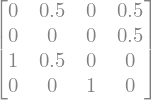

In [37]:
L = Matrix([[0,1/2,0,1/2],[0,0,0,1/2],[1,1/2,0,0],[0,0,1,0]])
L

Her kan vi se at L ikke opfylder kravene til en Markov matrix da ikke alle rækkerne summeret ikke giver 1, for eksempel række 3. Nu vil vi transponere matricen: 

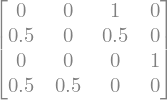

In [38]:
L.T

Nu kan vi konkludere at L^2 er en Markov matrix da alle rækkerne summeret nu giver 1. 

## Opgave 20

Vis, at hvis A er en Markov matrix så er Ae = e, det vil sige, at (1,e) er et egenpar for A.

Vi kender formlen A*v=lambda*v, som skal gælde for at vi har et egenpar. Vi skal vise at Ae = e, hvor A er en Markov matrix og e er enhedsvektoren, som betyder at den består af 1-taller. Vi kan opstille det således: 

$$ A * Matrix([1,1,...]) = λ * Matrix([1,1,...]) $$

Vi ved at i en Markov matrix er alle rækkerne summeret lig 1 hvilket vil sige at matricen * enhedsvektoren vil give en vektor med et-taller. defor har vi enhedsvektoren på højre side af ligningen og lambda * enhedsvektoren på den venstre side. Her kan vi se at for at ligningen skal gå op skal egenværdien være 1, da vi må multiplicere enhedsvektoren med noget for at få enhedsvektoren. 

Et egenpar skal opfylde følgende: A*v=lambda*v, hvor v er egenvektoren til A, A er en markov matrix og lambda er egenværdierne til A, for at vise at det er sandt, benytter vi et eksempel med identitetsmatricen, som markov matricen:

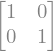

In [39]:
A = Matrix([[1,0],[0,1]])
A

Vi kan se at egenærdien er 1, hvilket den altid vil blive i en markov matrix, fordi alle rækkerne summeret bliver 1, da det er en diagonalmatrix, nu forsøger vi at finde en vektor der opfylder at Ae = e

In [40]:
v = Matrix([1,exp(1)])
v

In [41]:
A*v

Da A*v = (1,e) er (1,e)  et egenpar for A

## Opgave 21

Bevis at en matrix A og dens transponerede matrix A^T har de samme egenværdier. Vis derefter at de ikke nødvendigvis har de samme egenvektorer (det vil sige: giv et eksempel på en matrix A, hvor A og A^T har forskellige egenvektorrum).

In [42]:
B = Matrix([[0,1,0],[1/2,1/2,0],[0,0,1]])
B.eigenvals()

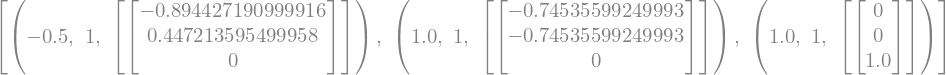

In [43]:
B.eigenvects()

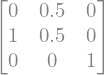

In [44]:
B1 = B.T
B1

In [45]:
B1.eigenvals()

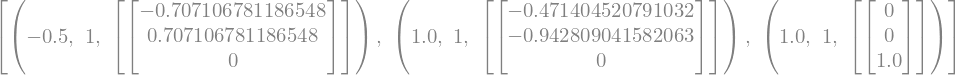

In [46]:
B1.eigenvects()

Nu har vi vist at egenværdierne er de samme for B og B1, men at egenvektorerne er forskellige. 

## Opgave 22

Lad A være en Markov matrix, og lad 0 < d < 1. Bevis, at A_d også er en Markov matrix, og at A_d har strengt positive elementer, det vil sige (A_d)_ij > 0 for alle i og j.

I det første led har vi $$((1-d)/n)*E_n$$, som bliver til en matrix hvor hvert element er $$(1-d)/n$$, fordi $E_n$ bare er en nxn matrix med 1-taller. Hvis vi ganger den matrix igennem med n får vi hvert element til 1-d. Det sidste led har vi d*A, hvor vi ved at A er en marko matrix, derfor giver alle rækkerne 1, så ender vi med at få d*1 på hver linje. Herefter kan vi se at vi får $1-d+d = 1$

In [47]:
x = symbols ('x')
(x/2)*2 + 1

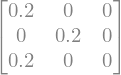

In [48]:
C = Matrix([[0.2,0,0],[0,0.2,0],[0.2,0,0]])
C

In [49]:
D = Matrix([[0.2666666,0.2666666,0.2666666],[0.2666666,0.2666666,0.2666666],[0.2666666,0.2666666,0.2666666]])

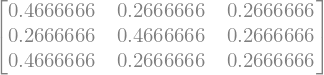

In [50]:
Q = C+D
Q

In [51]:
Q.eigenvals()

## Opgave 23

Vi antog tidligere, at den modificerede link matrix M_d havde egenværdi 1 for 0 < d < 1. Vis dette.

Fra tideligere (opgave 21) ved vi at en Markov matrix transponeret har samme egenværdier som den oprindelige markov matrix. Fra opgave 20 ved vi også at egenværdien for en Markov matrix er 1. Da vi ved at $M_d$ transponeret giver $A_d$ kan vi derfor udlede at $M_d$ har egenværdi 1.

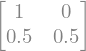

In [52]:
A = Matrix([[1,(0)],[(1/2),(1/2)]])
A

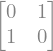

In [53]:
B = Matrix([[0,1],[1,0]])
B

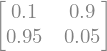

In [54]:
d = 0.1
G = d*A+(1-d)*B
G

In [55]:
G.eigenvals()

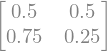

In [56]:
d = 0.5
G = d*A+(1-d)*B
G

In [57]:
G.eigenvals()

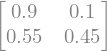

In [58]:
d = 0.9
G = d*A+(1-d)*B
G

In [59]:
G.eigenvals()

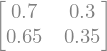

In [60]:
d = 0.7
G = d*A+(1-d)*B
G

In [61]:
G.eigenvals()

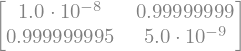

In [62]:
d = 0.00000001
G = d*A+(1-d)*B
G

In [63]:
G.eigenvals()

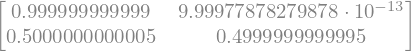

In [64]:
d = 0.999999999999
G = d*A+(1-d)*B
G

In [65]:
G.eigenvals()

## Opgave 24

Implementér en Python-funktion der, givet et netværk, kalder modified_link_matrix, finder en egenvektor tilhørende egenværdien 1, og laver den til en sandsynlighedsvektor.

In [66]:
def eigenvector_PageRank(web, d=0.85):
    # Input: web er en ordbog over websider og links.
    # d er dæmpningen
    # Output: En ordbog med de samme nøgler som web og værdierne er PageRank for nøglerne
    ranking = {}
    pagelist = list(web.keys())

    M = modified_link_matrix(web, pagelist, d = d)

    for i, page in enumerate(pagelist):
        ranking[page] = {pagelist[j]: M[j][i] for j in range(len(pagelist))}

    return ranking
eigenvector_PageRank(W1)


{'P1': {'P1': np.float64(0.030000000000000006),
  'P2': np.float64(0.455),
  'P3': np.float64(0.455),
  'P4': np.float64(0.030000000000000006),
  'P5': np.float64(0.030000000000000006)},
 'P2': {'P1': np.float64(0.030000000000000006),
  'P2': np.float64(0.030000000000000006),
  'P3': np.float64(0.88),
  'P4': np.float64(0.030000000000000006),
  'P5': np.float64(0.030000000000000006)},
 'P3': {'P1': np.float64(0.88),
  'P2': np.float64(0.030000000000000006),
  'P3': np.float64(0.030000000000000006),
  'P4': np.float64(0.030000000000000006),
  'P5': np.float64(0.030000000000000006)},
 'P4': {'P1': np.float64(0.030000000000000006),
  'P2': np.float64(0.030000000000000006),
  'P3': np.float64(0.030000000000000006),
  'P4': np.float64(0.030000000000000006),
  'P5': np.float64(0.88)},
 'P5': {'P1': np.float64(0.2),
  'P2': np.float64(0.2),
  'P3': np.float64(0.2),
  'P4': np.float64(0.2),
  'P5': np.float64(0.2)}}

## Opgave 25

At beregne egenvektorer for store matricer kan være tidskrævende. Lav et netværk med make_web funktionen, hvor n=5000 og k=10, og find PageRanken ved brug af eigenvector_PageRank. Undersøg og kommentér på køretiden.

In [67]:
# SE VENLIGST FILEN "opgave25.ipynb" FOR AT KØRE OPGAVEN, DET SER UD TIL AT DEN VIRKER VÆRRER I EN STOR NOTEBOOK

#web = make_web(5000,10,0)
#eigenvector_PageRank(web)

# PageRank algoritmen: Iterativ Konvergens og Dæmpning i Markov Matricer

## Opgave 26

Beregn produktet af følgende Markov matricer. Verificer at den resulterende matrix ligeledes er en Markov matrix?
$$A = Matrix([[0.2,0.5,0.3],[0.4,0.4,0.2],[0.1,0.7,0.2]])$$
$$B = Matrix([[0.5,0.3,0.2],[0.2,0.5,0.3],[0.3,0.2,0.5]])$$

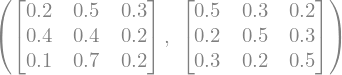

In [68]:
A = Matrix([[0.2,0.5,0.3],[0.4,0.4,0.2],[0.1,0.7,0.2]])
B = Matrix([[0.5,0.3,0.2],[0.2,0.5,0.3],[0.3,0.2,0.5]])
A, B

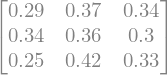

In [69]:
A*B

In [70]:
0.29+0.37+0.34

In [71]:
0.34+0.36+0.3

In [72]:
0.25+0.42+0.33

## Opgave 27

Vis at produktet af to Markov matricer er en Markov matrix.

Grunden til at produktet af to markov matricer altid vil give en markov matrix skyldes blandt andet at alle tal i en markov matrix er positive, hvilket vil sige at produktet også kun vil få positive værdier, og den anden grund er at summen af rækkerne i en markov matrix altid skal give en, for at det er en markov matrix, derfor når man ganger dem sammen, giver summen af to markov matricer en matrix, hvor rækkernes sum bliver 1

$$ C_{ij} = ∑A_{ik} * B_{kj} >= 0 $$

$$ ∑C_{ij} = ∑∑A_{ik} * B_{kj} $$

$$ = ∑A_{ik} * ∑B_{kj} $$

$$ ∑B_{kj} = 1 $$

$$ ∑C_{ij} = ∑A_{ik}*1 = ∑A_{ik} = 1 $$

## Opgave 28

Konkludér at hvis A er en Markov matrix, så er $A^k$ også en Markov matrix for alle  k er en mængde af N
.

$A^k$ er A gange A gange A... k gange

Som tideligere nævnt vil produktet af to markov matricer ganget sammen blive en markov matrix, det betyder at man ganger uendeligt mange markov matricer sammen, og det vil altid give en markov matrix.

## Opgave 29

Lad A være en nxn Markov matrix. Vis at $rad_A = 1$
.

Informeret i opgaven er:  ingen egenværdier af en markov matrix har absolutværdi større end 1. Hvilket vil sige at den spektrale radius $rad_A$ af en Markov matrix A er lig 1

Note: den spektrale radius er den største absolutte værdi af alle egenværdierne til en matrix (taget fra chatGPT)

Hint: Antag at A har en egenværdi lambda med den absolutte værdi af lambda større end 1. Lad v være den tilhørende egenvektor. For en Markov matrix er summen af hver række netop 1, altså kan Av = lambda*v ses som n (forskellige) vægtede gennemsnit af v1, v2,...,vn. Hvor stor kan absolutværdien af et vægtet gennemsnit af n elementer maksimalt være?

Egenværdiproblemet

Vi benytter egenværdiproblemet: 

A*v = λ * v

Vi kalder max v for v_k

## Opgave 30

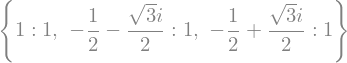

In [73]:
A = Matrix([[0,1,0],[0,0,1],[1,0,0]])
A.eigenvals() # egenværdierne findes

Modulus af egenværdierne findes ved at tage den absolutte værdi af værdien.

In [74]:
print(abs(1))
print(abs((-1/2)-(sqrt(3)*I/2)))
print(abs((-1/2)+(sqrt(3)*I/2)))

1
1.00000000000000
1.00000000000000


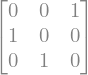

In [75]:
A*A

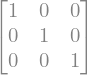

In [76]:
A*A*A

Nu forsøger vi at se på de næste $A^k$, for at se hvordan det udvikler sig, sagt på anden vis, om der er et mynster:

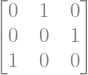

In [77]:
A*A*A*A

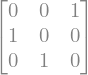

In [78]:
A**5

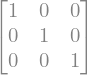

In [79]:
A**6

Heraf kan vi se at den ikke konvagerer, da mynsteret går i ring, den er der i mod divergent

## Opgave 31 (MANGLER?!)

## Opgave 32

Til at dæmpe matricen med en faktor 0.85 benyttes formlen: $$ M = dæmpningsfaktoren * L + (1-dæmpningsfaktoren) * (1/n) * E$$

In [80]:
E = Matrix([[1,1,1],[1,1,1],[1,1,1]])

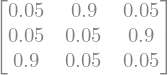

In [81]:
M = 0.85*A+(1-0.85)*1/3*E
M

Dermed er $A_d$ lig med:

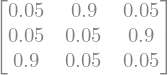

In [82]:
A_d = M
A_d

In [83]:
A_d.eigenvals() # egenværdierne findes

In [84]:
print(abs(-0.425 - 0.736121593216773*I))
print(abs(-0.425 + 0.736121593216773*I))
print(abs(1.0+5.1434798388906*10 **-66*I)) # modulus findes

0.850000000000000
0.850000000000000
1.00000000000000


Vi kan se at en af eigenværdiernes modulus er 1, hvilket stemmer overens med at det er en markov matrix, da vi som tideligere nævnt kom frem til at en markov matrix altid har en egenværdi med modulus 1.

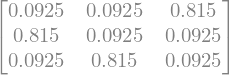

In [85]:
A_d**2 # Vi tjekker om den konvergerer

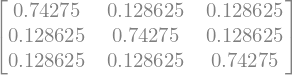

In [86]:
A_d**3

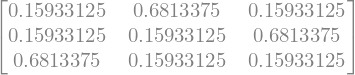

In [87]:
A_d**4

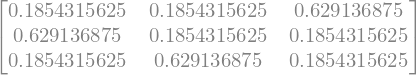

In [88]:
A_d**5

Ja $A_d$ konvergerer for k -> uendelig, da matricens mynster ikke går i ring

## Opgave 33

Forklar hvorfor Sætning 1 er relevant for PageRank algoritmen.

(Den første del af sætningen siger at n i en markov matrix med strengt positive elementer skal være over 2, hvilket betyder at matricen skal være mindst en 2 x 2 matrice. Den næste del siger at der skal være en entydig vektor (kun en vektor) og at $A^T$ * x = x, hvilket betyder at egenværdierne skal være 1, når alle elementer x er positive og summerer til 1.)

Til sidst i sætningen står der $$lim(A^T)^k = x*e^t = [x, x, x,..., x]$$ i den første del er $A^T$= L, hvilket skal benyttes til PageRank algoritmen, og her tages lim af linkmatricen i k, altså ganget med sig selv k gange. Den næste del af ligningen indeholder x, hvilket er en egenvektor og e^t, hvilket vi fra opgave 31, ved er en enhedsvektor bestående af 1'taller. Den sidste del af ligningen viser udfaldet af det hele, og siger at det bliver til en transponeret vektor indholdene x, som ifølge chatGPT er PageRank-vektoren. (Tror det hænger sammen på den måde)

Det er relevant for PageRank algoritmen, da en del af definitionen på en linkmatrice er at søjlerne hver især har en sum på 1, hvilket betyder at linkmatricen transponeret er en markov matrix... (Er ikke sikker på at det er rigtigt)

## Opgave 34

Hænger meget sammen med opgave 33

e = enhedsvektor = [1,1,1,...,1], derfor er:

$$ x*e^t = x* [1,1,1,...,1]^t = x*[1,1,1,...,1] = [x,x,x,...,x] $$

# Opgave 35

In [89]:
def matrix_PageRank(web, power, d=0.85):

    ranking = dict()

    pagelist = list(web.keys())

    M = modified_link_matrix(web, pagelist, d)

    temp = np.ones(len(pagelist)) / len(pagelist)

    for _ in range (power):
        temp = M @ temp

    for i in range(len(pagelist)):
        ranking[pagelist[i]] = float(round(temp[i], 6))
        
    return ranking

print("matrix page rank:", matrix_PageRank(W1,50))

matrix page rank: {'P1': 0.339422, 'P2': 0.188018, 'P3': 0.347833, 'P4': 0.043764, 'P5': 0.080963}


# Analyse af PageRank Modeller og Undersøgelse af Dæmpning

## Opgave 39 (MANGLER?!)

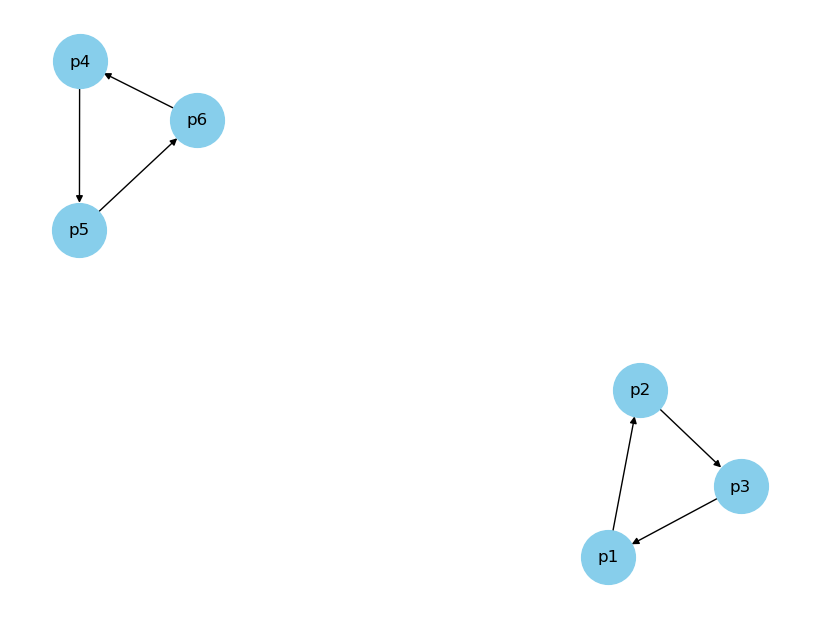

In [90]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
G.add_nodes_from(nodes)

edges = [('p1', 'p2'),
         ('p2', 'p3'),
         ('p3', 'p1'),
         ('p4', 'p5'),
         ('p5', 'p6'),
         ('p6', 'p4')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.show()

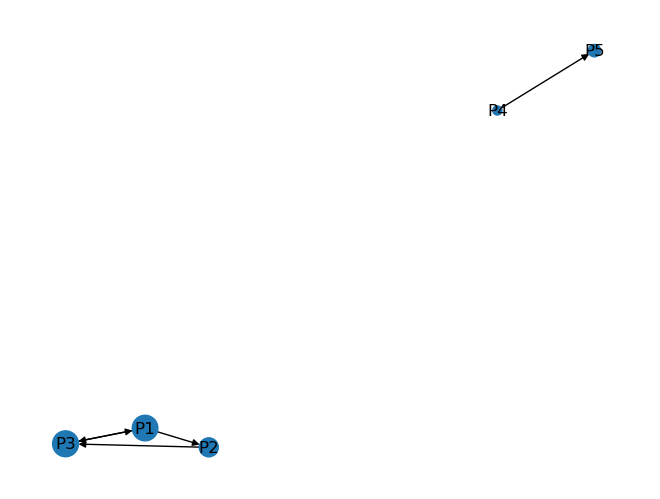

In [102]:
def plot_ranking(web, ranking, d=0.85):

    # Input: web og ranking er dictionary, eksempelvis som output fra funktionerne "make_web" og "random_surf".

    # Output: Grafisk repræsentation af webstrukturen med links som #pile og PageRank visualiseret ved størrelsen af hjemmesider.

    # INSERT CODE HERE

    G = nx.DiGraph()

    G.add_nodes_from(web)

    for src, targets in web.items():
        for tgt in targets:
            G.add_edge(src, tgt)

    node_sizes = []
    for node in ranking:
        node_sizes.append(int(ranking[node] * 1000))

    nx.draw(G, with_labels=True, node_size=node_sizes, arrows=True)
    plt.show()

ranking = matrix_PageRank(W1,50)
plot_ranking(W1, ranking)

## Opgave 40 (MANGLER?!)

# Jordans Normal From Generalisering af Diagonaliserbarhed

## Opgave 41 (MANGLER?!)